In [2]:
#Import libaries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Exercise 7.1: 
Conditional distributions in census data.

In [3]:
# 1- import the data
df= pd .read_csv("census.csv", sep=";")

In [3]:
df

,Name,Total,rel_foreign,rel_women
0,"Flensburg, Stadt",95016,0.154944,0.507088
1,"Kiel, Landeshauptstadt",249126,0.122734,0.511028
2,"Lübeck, Hansestadt",215952,0.113522,0.520161
3,"Neumünster, Stadt",79622,0.119133,0.504358
4,"Brunsbüttel, Stadt",12579,0.091784,0.498012
...,...,...,...,...
10780,Göpfersdorf,219,0.013953,0.493088
10781,Langenleuba-Niederhain,1728,0.003484,0.490708
10782,Nobitz,7018,0.008116,0.500855
10783,Dobitschen,411,0.011962,0.500000


**2- Distribution of the number of inhabitants**

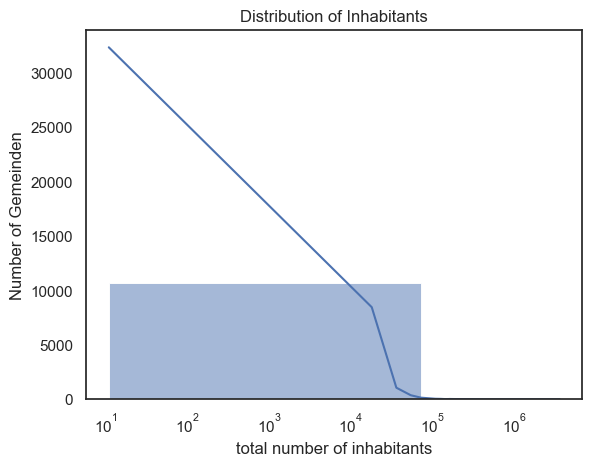

In [7]:
sns.set(style="white")
sns.histplot(df["Total"], bins= 50, kde=True,)
plt.xscale("log")  # Optional: log scale for better visualization
plt.title("Distribution of Inhabitants")#
plt.xlabel("total number of inhabitants")
plt.ylabel("Number of Gemeinden")
plt.show()

3- **Distribution of the fraction of women, dependent on the number of inhabitants**

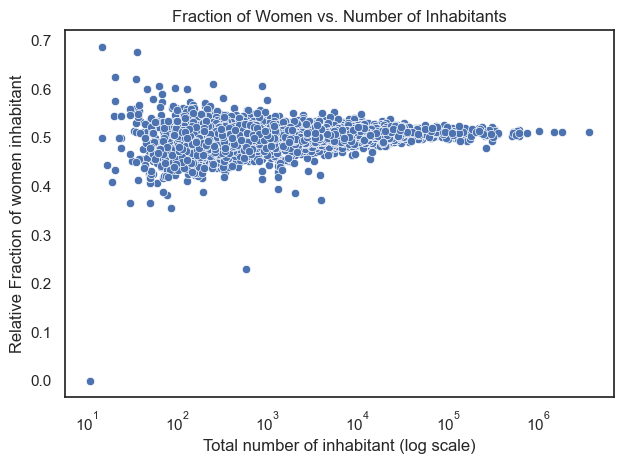

In [10]:
plt.Figure(figsize=(8,8))
sns.scatterplot(data=df, x="Total", y="rel_women")
plt.xscale("log")
plt.title("Fraction of Women vs. Number of Inhabitants")
plt.xlabel("Total number of inhabitant (log scale)")
plt.ylabel("Relative Fraction of women inhabitant")
plt.tight_layout()
plt.show()

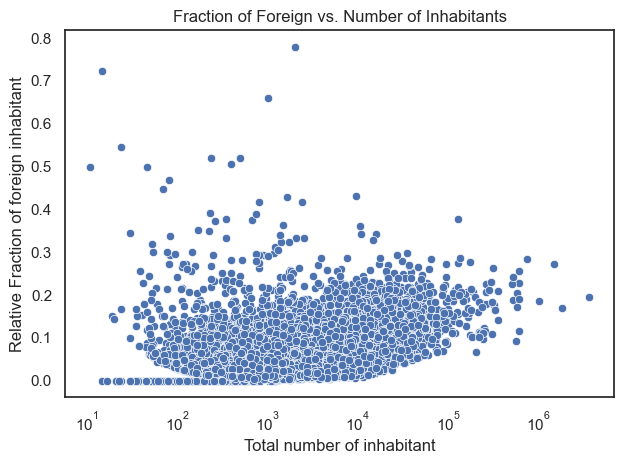

In [16]:
plt.Figure(figsize=(10,8))
sns.scatterplot(data=df, x="Total", y="rel_foreign")
plt.xscale("log")
plt.title("Fraction of Foreign vs. Number of Inhabitants")
plt.xlabel("Total number of inhabitant")
plt.ylabel("Relative Fraction of foreign inhabitant")
plt.tight_layout()
plt.show()

### Exercise 7.2:
Visualizing a relational database as decorated graph. 

In [12]:

# Define example columns for each table (excluding foreign/key columns)
table_columns = {
    "Journalist": ["name", "email", "bio"],
    "Article": ["title", "content", "publication_date", "num_views"],
    "Category": ["name", "description"],
    "Reader": ["username", "email", "join_date"],
    "Comment": ["content", "timestamp", "likes_count"],
    "Reaction": ["type", "timestamp"]
}

# Display the suggested columns
print("Suggested non-key columns for each table:\n")
for table, columns in table_columns.items():
    print(f"{table}: {', '.join(columns)}")


Suggested non-key columns for each table:

Journalist: name, email, bio
Article: title, content, publication_date, num_views
Category: name, description
Reader: username, email, join_date
Comment: content, timestamp, likes_count
Reaction: type, timestamp


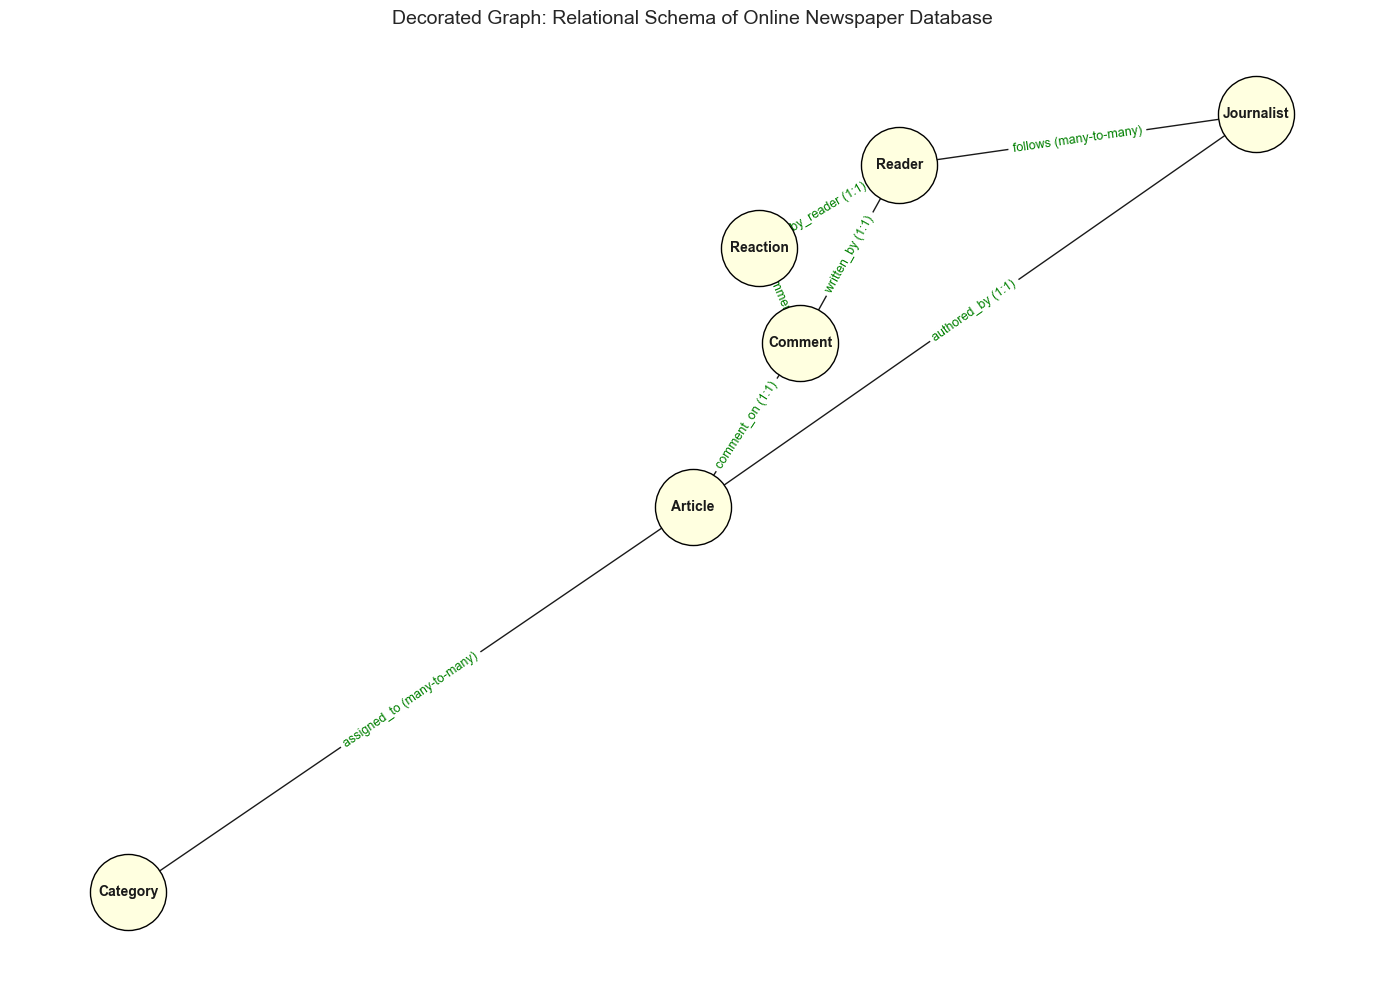

In [15]:
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add table nodes
for table in table_columns:
    G.add_node(table)

# Define relationships (edges)
relations = [
    ("Article", "Journalist", "authored_by (1:1)"),
    ("Article", "Category", "assigned_to (many-to-many)"),  # via Assigned table
    ("Comment", "Reader", "written_by (1:1)"),
    ("Comment", "Article", "comment_on (1:1)"),
    ("Reaction", "Reader", "by_reader (1:1)"),
    ("Reaction", "Comment", "on_comment (1:1)"),
    ("Reader", "Journalist", "follows (many-to-many)")  # via Follow table
]

# Add edges with labels
for src, tgt, label in relations:
    G.add_edge(src, tgt, label=label)

# Set positions using spring layout
pos = nx.spring_layout(G, seed=42)

# Draw nodes
plt.figure(figsize=(14, 10))
nx.draw_networkx_nodes(G, pos, node_size=3000, node_color='lightyellow', edgecolors='black')
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

# Draw edges and labels
nx.draw_networkx_edges(G, pos, arrows=True)
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='green', font_size=9)

# Title and layout
plt.title("Decorated Graph: Relational Schema of Online Newspaper Database", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.savefig("exercise7_2_decorated_graph.png")
plt.show()